<Axes: >

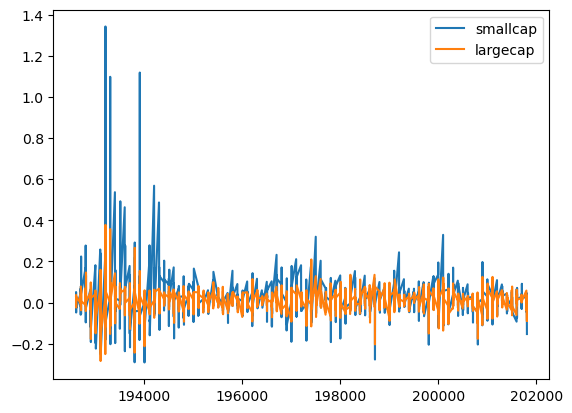

In [1]:
import pandas as pd
me_m = pd.read_csv("Files/data/Portfolios_Formed_on_ME_monthly_EW.csv",
                    header=0, 
                    index_col=0, 
                    na_values = -99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['smallcap','largecap']
rets = rets/100
rets.plot.line()

In [2]:
rets.head()

,smallcap,largecap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [3]:
rets.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [4]:
rets.index = pd.to_datetime(rets.index, format ="%Y%m")
rets.head()

,smallcap,largecap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [5]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [6]:
rets.index = rets.index.to_period('M')
rets

,smallcap,largecap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


In [7]:
rets_1975 = rets[rets.index.year == 1975]
rets_1975

,smallcap,largecap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [8]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [9]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   smallcap  1110 non-null   float64
 1   largecap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Computing drawdowns
1. Compute wealth index
2. Compute previous peak
3. Compute dd as a percent (wealth value as a percent of previous peak

In [10]:
wi = 1000*(1+rets["largecap"]).cumprod()

In [11]:
wi.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: largecap, dtype: float64

<Axes: >

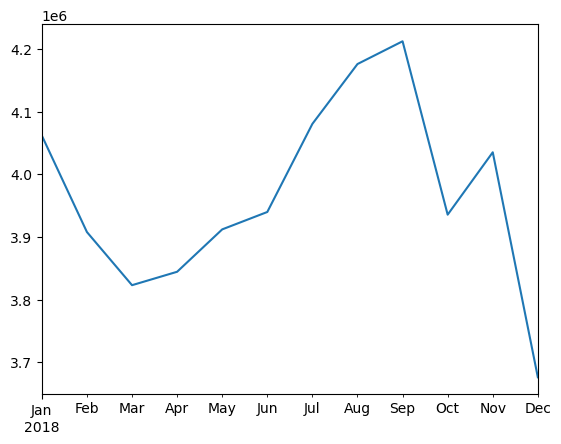

In [17]:
wi["2018":].plot.line()

<Axes: >

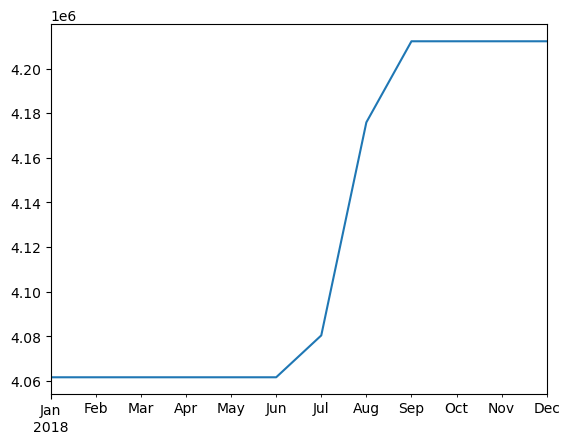

In [18]:
previouspeaks = wi.cummax()
previouspeaks["2018":].plot()

<Axes: >

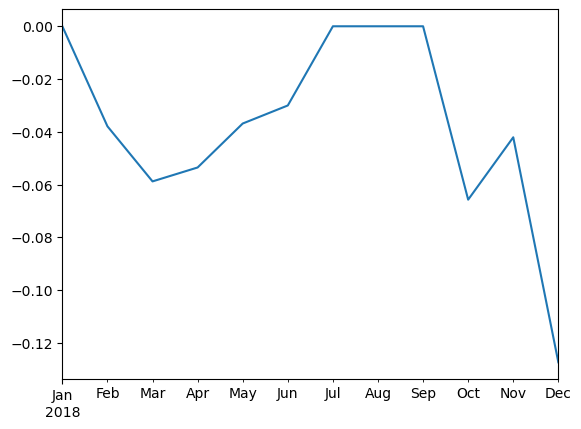

In [16]:
dd = (wi["2018":] - previouspeaks["2018":])/previouspeaks["2018":]
dd.plot()

In [42]:
dd.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: largecap, dtype: float64

In [43]:
dd

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.024300
1926-11    0.000000
             ...   
2018-08    0.000000
2018-09    0.000000
2018-10   -0.065700
2018-11   -0.042062
2018-12   -0.127319
Freq: M, Name: largecap, Length: 1110, dtype: float64

<Axes: >

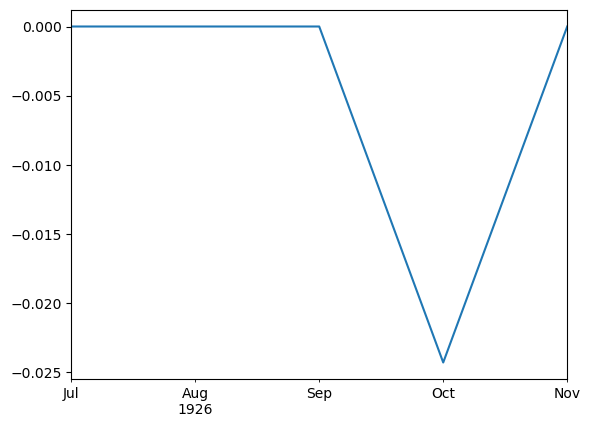

In [46]:
ddh = dd.head()
ddh.plot()

In [47]:
dd.min()

-0.8400375277943123

In [52]:
dd.idxmin()

Period('1932-05', 'M')

In [66]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    computes and returns a data frame that contains:
    the wealth index
    previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1+ return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns
    })

In [69]:
drawdown(rets["largecap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [71]:
drawdown(rets["largecap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<Axes: >

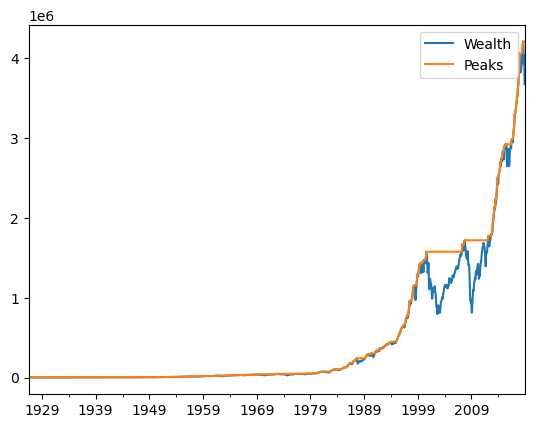

In [72]:
drawdown(rets["largecap"])[["Wealth", "Peaks"]].plot()

<Axes: >

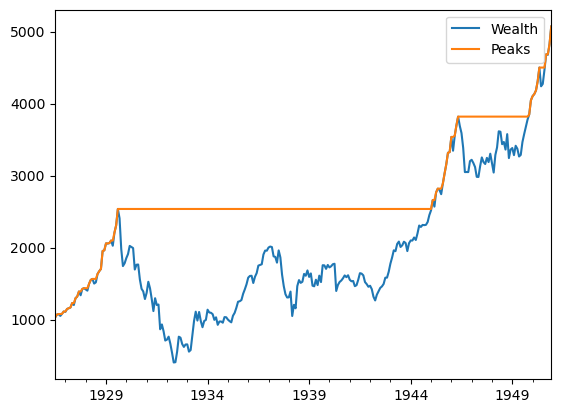

In [74]:
drawdown(rets[:"1950"]["largecap"])[["Wealth", "Peaks"]].plot() 

In [80]:
drawdown(rets["largecap"])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [79]:
drawdown(rets["smallcap"])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [81]:
drawdown(rets["1940":]["smallcap"])[["Drawdown"]].idxmin()

Drawdown    1974-12
dtype: period[M]

In [82]:
drawdown(rets["1940":]["largecap"])[["Drawdown"]].idxmin()

Drawdown    2009-02
dtype: period[M]